## SOM on credit card fraud

In [21]:
# anomaly detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./week_6/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [3]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler()
X = sc.fit_transform(X)


In [7]:
from minisom import MiniSom

In [8]:
som = MiniSom(x = 10, y = 10, input_len= 15, sigma = 1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration= 100)

In [9]:
# visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()

<Figure size 432x288 with 0 Axes>

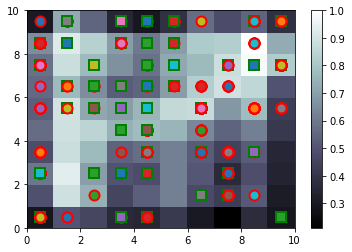

In [12]:
pcolor(som.distance_map().T)
plt.colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = None,
        markersize = 10,
        markeredgewidth = 2)
    
show()

In [20]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]))
frauds = sc.inverse_transform(frauds)

ValueError: all the input arrays must have same number of dimensions